In [1]:
#empecemos importando las librerias pertinentes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.metrics import *

# Problema I

**Se desea estimar el valor Y de una casa dada su superficie X1 y el número de
habitaciones X2.**

In [2]:
#importemos lo necesario para el problema en cuestión
from sklearn.linear_model import LinearRegression

In [3]:
# leamos los datos antes de nada
df = pd.read_csv('Problema_1.csv', sep=';')
for row in df:
    df[row] = pd.to_numeric(df[row], downcast='float')
df

Y    X1   X2
0  120.0  60.0  1.0
1  125.0  55.0  2.0
2  130.0  70.0  1.0
3  112.0  60.0  2.0
4  122.0  62.0  1.0
5  135.0  70.0  2.0
6  128.0  60.0  3.0
7  141.0  80.0  1.0
8  150.0  80.0  2.0
9  160.0  85.0  3.0

In [4]:
# Ya que es comun a todo el problema, creemos el modelo:


#### *1)* El modelo de regresión lineal simple de Y en función de X1.

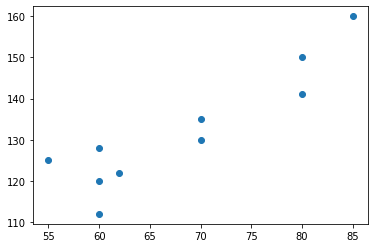

In [5]:
# Antes de empezar a hacer calculos, mostremos los datos gráficamente
plt.scatter(df.X1, df.Y)

In [6]:
#creemos el modelo:
M1 = LinearRegression()
# Como la función LinearRegression pide que la infromacion de entrada sea un array de 2 dimensiones, lo adecuamos
x = np.array(df.X1).reshape(-1,1)
y = np.array(df.Y)
M1.fit(x, y)

LinearRegression()

In [7]:
# Numércamente:
print(f'Modelo de regresion linear simple de Y en funcion de X1:')
print(f'\t Y = {M1.intercept_} + {M1.coef_[0]}x')

Modelo de regresion linear simple de Y en funcion de X1:
	 Y = 46.118980407714844 + 1.2636513710021973x


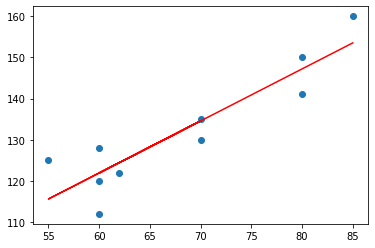

In [8]:
#Gráficamente:
plt.scatter(df.X1, df.Y)
plt.plot(df.X1, M1.predict(x), color='red')

#### *2)* El modelo de regresión lineal simple de Y en función de X2.

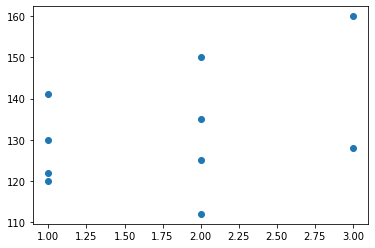

In [9]:
# Antes de empezar a hacer calculos, mostremos los datos gráficamente
plt.scatter(df.X2, df.Y)

In [10]:
#creemos el modelo:
M2 = LinearRegression()
# Como la función LinearRegression pide que la infromacion de entrada sea un array de 2 dimensiones, lo adecuamos
x = np.array(df.X2).reshape(-1,1)
y = np.array(df.Y)
M2.fit(x, y)

LinearRegression()

In [11]:
# Numércamente:
print(f'Modelo de regresion linear simple de Y en funcion de X1:')
print(f'\t Y = {M2.intercept_} + {M2.coef_[0]}x')

Modelo de regresion linear simple de Y en funcion de X1:
	 Y = 119.5714340209961 + 7.071427822113037x


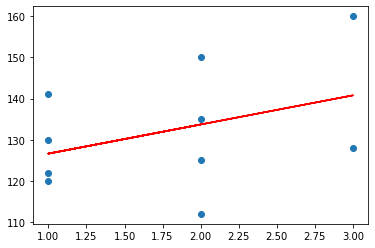

In [12]:
#Gráficamente:
plt.scatter(df.X2, df.Y)
plt.plot(df.X2, M2.predict(x), color='red')

#### *3)* El modelo de regresión lineal múltiple de Y en función de X 1 y X 2.

In [13]:
#importemos nuevas herramientas
import plotly.express as px

In [14]:
# Antes de nada, mostremos los datos:
fig = px.scatter_3d(
        df,
        x=df.X1, y=df.X2, z=df.Y, 
        size=df.X2, size_max = 10)

fig.show()

In [15]:
#creemos el modelo:
M3 = LinearRegression()
# creemos las variables con los datos necesarios:
x = df.drop('Y', axis=1)
y = np.array(df.Y)
M3.fit(x, y)

LinearRegression()

In [16]:
# veamos la representacion matemática del plano:
print(f'\t Y = {M3.intercept_} + {M3.coef_[0]} X1 + {M3.coef_[1]} X2')

	 Y = 40.348670959472656 + 1.2154724597930908 X1 + 5.0311737060546875 X2


He intentado crear el plano en 3D, pero por algún motivo no consigo generar la el plano junto con la distribución del scatter plot en el mismo gráfico.<br/>
Dejo el código empleado a sabiendas de que no funciona:

In [17]:
# antes de nada importemos las librerias
import plotly.graph_objects as go

In [18]:
fig.add_traces(go.Surface(x=df.X1, y=df.X2, z=M3.predict(x), name='ML Regresion'))
fig.show()

***4)* Validemos los modelos:**

In [19]:
#preparemos tambien los datos de test
df_test = pd.read_csv('Problema_1_test.csv', sep=';')
for row in df_test:
    df_test[row] = pd.to_numeric(df_test[row], downcast='float')
df_test

Y    X1   X2
0  120.0  58.0  1.0
1  128.0  50.0  3.0
2  140.0  80.0  1.0
3  115.0  65.0  2.0
4  120.0  55.0  1.0
5  145.0  75.0  2.0
6  125.0  55.0  3.0
7  170.0  80.0  3.0
8  135.0  70.0  1.0
9  155.0  75.0  3.0

In [20]:
#adecuemos los datos:
x1 = np.array(df_test.X1).reshape(-1,1)
x2 = np.array(df_test.X2).reshape(-1,1)
x3 = df_test.drop('Y', axis=1)

In [21]:
print(f'   Error Absoluto Médio | Raiz del Error Cuadrático Médio | Coeficiente de deterrminacion')
print(f'M1  {mean_absolute_error(df_test.Y, M1.predict(x1))}   |\t{mean_squared_error(df_test.Y, M1.predict(x1))}\t  |\t{r2_score(df_test.Y, M1.predict(x1))}')
print(f'M2  {mean_absolute_error(df_test.Y, M2.predict(x2))}  |\t{mean_squared_error(df_test.Y, M2.predict(x2))}\t  |\t{r2_score(df_test.Y, M2.predict(x2))}')
print(f'M3  {mean_absolute_error(df_test.Y, M3.predict(x3))}   |\t{mean_squared_error(df_test.Y, M3.predict(x3))}\t  |\t{r2_score(df_test.Y, M3.predict(x3))}')

   Error Absoluto Médio | Raiz del Error Cuadrático Médio | Coeficiente de deterrminacion
M1  9.494417190551758   |	142.0280303955078	  |	0.4831774073550743
M2  13.699999809265137  |	228.22854614257812	  |	0.1695041751892472
M3  7.710031032562256   |	84.10834503173828	  |	0.6939400097496518


**Conclusión:**<br>
Se aprecia al validar los modelos que efectivamente a más variables relevantes para realizar predicciones, más preciso será el modelo. Se puede ver además que los metros cuadrados de las casas (X1), tienen mayor peso a la hora de hacer predicciones, ya que la variación de esta variable y la de la variable objetivo evolucionan de forma más pareja.

***

# Problema II

***1)* Hallar las predicciones del modelo para el siguiente conjunto de test.**

Definamos las funciones de regresion y creemos la funcion de predicción:

In [22]:
def seto (x1, x2, x3, x4):  # 1
    res = 541.0741
    res -= 33.121 * x1
    res -= 10.2824 * x2
    res -= 38.5734 * x3
    res -= 90.4374 * x4 
    return res

In [23]:
def vers (x1, x2, x3, x4):  # 2
    res = 501.1562
    res -= 26.3497 * x1
    res -= 24.2689 * x2
    res -= 10.7613* x3
    res -= 130.0915 * x4 
    return res

In [24]:
def virg (s, v):  # 3
    return (1 - s - v)

In [25]:
def pred (df):
    pred = list()
    for index, row in df.iterrows():
        se = seto(row.X1, row.X2, row.X3, row.X4)
        ve = vers(row.X1, row.X2, row.X3, row.X4)
        vi = virg(se, ve)
        if se > ve and se > vi:
            pred.append(1)
        elif ve > vi:
            pred.append(2)
        else:
            pred.append(3)
    df['pred'] = pred
        

In [26]:
# Leamos los datos:
df = pd.read_csv('Problema_2.csv', sep=';')
df

X1   X2   X3   X4  Y
0  4.6  3.2  1.4  0.2  1
1  5.3  3.7  1.5  0.2  1
2  5.7  4.4  1.5  0.4  1
3  5.0  3.5  1.6  0.6  2
4  5.5  2.5  4.0  1.3  2
5  5.7  3.0  4.2  1.2  2
6  5.7  2.8  4.1  1.3  3
7  5.8  2.7  5.1  1.9  3
8  6.3  2.5  5.0  1.9  3
9  5.9  3.0  5.1  1.8  3

In [27]:
# Apliquemos la funcionde prediccion:
pred(df)
df

X1   X2   X3   X4  Y  pred
0  4.6  3.2  1.4  0.2  1     1
1  5.3  3.7  1.5  0.2  1     1
2  5.7  4.4  1.5  0.4  1     1
3  5.0  3.5  1.6  0.6  2     1
4  5.5  2.5  4.0  1.3  2     2
5  5.7  3.0  4.2  1.2  2     2
6  5.7  2.8  4.1  1.3  3     2
7  5.8  2.7  5.1  1.9  3     3
8  6.3  2.5  5.0  1.9  3     3
9  5.9  3.0  5.1  1.8  3     3

***2)* Evaluar el rendimiento del clasificador en dicho conjunto.**

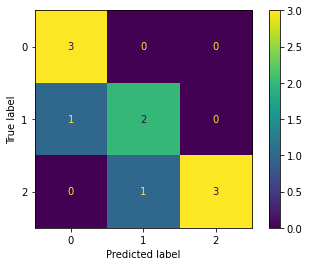

In [28]:
# empecemos calculando la matriz de confusión:
cm = confusion_matrix(df.Y, df.pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [29]:
# Calculemos las variables necesarias parala clase 1
TP_1 = np.diag(cm)[0]
FP_1 = (cm.sum(axis=0) - TP_1)[0]  # columna (axis = 0 representa la suma por columnas)
FN_1 = (cm.sum(axis=1) - TP_1)[0]  # fila (axis = 1 representa la suma por filas)
TN_1 = np.diag(cm)[1] + np.diag(cm)[2]

# Precicion Global
ACC_1 = '{:.2f}'.format((TP_1+TN_1)/(TP_1+FP_1+FN_1+TN_1))
# Sensibilidad
TPR_1 = '{:.2f}'.format(TP_1/(TP_1+FN_1))
# False positive rate
FPR_1 = '{:.2f}'.format(FP_1/(FP_1+TN_1))
# Especificidad
TNR_1 = '{:.2f}'.format(TN_1/(TN_1+FP_1) )
# Precision
PPV_1 = '{:.2f}'.format(TP_1/(TP_1+FP_1))
#F1 score
F1_1 = '{:.2f}'.format((2*TP_1) / (2*TP_1+FP_1+FN_1))

In [30]:
# Calculemos las variables necesarias parala clase 2
TP_2 = np.diag(cm)[1]
FP_2 = (cm.sum(axis=0) - TP_2)[1]
FN_2 = (cm.sum(axis=1) - TP_2)[1]
TN_2 = np.diag(cm)[0] + np.diag(cm)[2]

# Precicion Global
ACC_2 = '{:.2f}'.format((TP_2+TN_2)/(TP_2+FP_2+FN_2+TN_2))
# Sensibilidad
TPR_2 = '{:.2f}'.format(TP_2/(TP_2+FN_2))
# False positive rate
FPR_2 = '{:.2f}'.format(FP_2/(FP_2+TN_2))
# Especificidad
TNR_2 = '{:.2f}'.format(TN_2/(TN_2+FP_2))
# Precision
PPV_2 = '{:.2f}'.format(TP_2/(TP_2+FP_2))
#F1 score
F1_2 = '{:.2f}'.format((2*TP_2) / (2*TP_2+FP_2+FN_2))

In [31]:
3# Calculemos las variables necesarias parala clase 3
TP_3 = np.diag(cm)[2]
FP_3 = (cm.sum(axis=0) - TP_2)[2]
FN_3 = (cm.sum(axis=1) - TP_2)[2]
TN_3 = np.diag(cm)[0] + np.diag(cm)[1]

# Precicion Global
ACC_3 = '{:.2f}'.format((TP_3+TN_2)/(TP_3+FP_3+FN_3+TN_3))
# Sensibilidad
TPR_3 = '{:.2f}'.format(TP_3/(TP_3+FN_3))
# False positive rate
FPR_3 = '{:.2f}'.format(FP_3/(FP_3+TN_3))
# Especificidad
TNR_3 = '{:.2f}'.format(TN_3/(TN_3+FP_3))
# Precision
PPV_3 = '{:.2f}'.format(TP_3/(TP_3+FP_3))
#F1 score
F1_3 = '{:.2f}'.format((2*TP_3) / (2*TP_3+FP_3+FN_3))

In [32]:
print('   Precision Global | Sensibilidad | False Positive Rate | Especificidad | Precision | F1 Score')
print(f'Se \t{ACC_1}\t    |     {TPR_1}     |\t    {FPR_1}\t |\t{TNR_1}\t |   {PPV_1}    |   {F1_1}')
print(f'Ve \t{ACC_2}\t    |     {TPR_2}     |\t    {FPR_2}\t |\t{TNR_2}\t |   {PPV_2}    |   {F1_2}')
print(f'Vi \t{ACC_3}\t    |     {TPR_3}     |\t    {FPR_3}\t |\t{TNR_3}\t |   {PPV_3}    |   {F1_3}')  

   Precision Global | Sensibilidad | False Positive Rate | Especificidad | Precision | F1 Score
Se 	0.89	    |     1.00     |	    0.17	 |	0.83	 |   0.75    |   0.86
Ve 	0.80	    |     0.67     |	    0.14	 |	0.86	 |   0.67    |   0.67
Vi 	0.82	    |     0.60     |	    0.17	 |	0.83	 |   0.75    |   0.67


***3)* Comparar el modelo obtenido con el expuesto en la lección 3.**

Ateniéndonos a los resultados proporcionados en el manual, observamos que el modelo empleado en el ejercicio es menos preciso a término general, sin embargo, la precisión global del modelo presentado en el ejercicio no es mala en absoluto.

***

# Problema III

***1)* Hallar las predicciones del modelo para el siguiente conjunto de test, con
el valor de k = 1 y k = 3 vecinos, y la distancia euclídea.**

In [33]:
# Importemos lo necesario:
from sklearn.neighbors import KNeighborsClassifier as knc

In [34]:
# Leamos los datos:
df = pd.read_csv('Problema_3.csv', sep=';')
df_test = pd.read_csv('Problema_3_test.csv', sep=';')

Para reslover la primera parte haremos uso del clasificador K_Neightbours_Classifier de sklearn.
Por defecto, este clasificador viene configurado con la métrica Minokwsy con p=2, lo cual equivale a la distancia euclidea clásica.

In [35]:
# prepatamos las variarbles paa el entrenamiento:
X = np.array(df.drop('Y', axis=1))
X_test = np.array(df_test.drop('Y', axis=1))
y = np.array(df.Y)

In [36]:
# creamo el modelo para 1 vecino:
neigh_1 = knc(n_neighbors=1)

In [37]:
# Entrenemos el modelo:
neigh_1.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [38]:
# creamo el modelo para 3 vecinos:
neigh_3 = knc(n_neighbors=3)

In [39]:
# Entrenemos el modelo:
neigh_3.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [40]:
# Añadimos las predicciones al df_test:
df_test['Neigh = 1'] = neigh_1.predict(X_test)
df_test['Neigh = 3'] = neigh_3.predict(X_test)
df_test

X1   X2   X3  Y  Neigh = 1  Neigh = 3
0  5.0  3.5  1.7  1          2          1
1  4.3  2.8  1.5  1          1          1
2  2.7  4.5  1.2  3          1          1
3  5.0  4.2  1.3  3          3          1
4  6.3  2.5  4.1  1          2          2
5  5.2  3.0  4.5  2          2          2
6  4.5  3.0  4.2  2          1          2
7  5.9  2.9  5.2  2          3          1
8  5.0  2.4  5.1  1          1          1
9  4.5  3.2  5.0  2          1          1

***2)*Evaluar el rendimiento del clasificador en dicho conjunto para ambos valores de k.**

Empecemos por Neighbor = 1

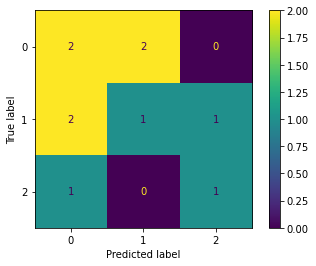

In [41]:
# Creamos la matriz de confusión:
cm = confusion_matrix(df_test.Y, df_test['Neigh = 1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [42]:
# Calculemos las variables para la clase 0
TP = np.diag(cm)[0]
FP = (cm.sum(axis=0) - TP)[0]  # columna (axis = 0 representa la suma por columnas)
FN = (cm.sum(axis=1) - TP)[0]  # fila (axis = 1 representa la suma por filas)
TN = np.diag(cm)[1] + np.diag(cm)[2]

# Precicion Global
ACC_1 = '{:.2f}'.format((TP+TN)/(TP+FP+FN+TN))
# Sensibilidad
TPR_1 = '{:.2f}'.format(TP/(TP+FN))
# False positive rate
FPR_1 = '{:.2f}'.format(FP/(FP+TN))
# Especificidad
TNR_1 = '{:.2f}'.format(TN/(TN+FP) )
# Precision
PPV_1 = '{:.2f}'.format(TP/(TP+FP))
#F1 score
F1_1 = '{:.2f}'.format((2*TP) / (2*TP+FP+FN))

In [43]:
# Calculemos las variables para la clase 1
TP = np.diag(cm)[1]
FP = (cm.sum(axis=0) - TP)[1]  # columna (axis = 0 representa la suma por columnas)
FN = (cm.sum(axis=1) - TP)[1]  # fila (axis = 1 representa la suma por filas)
TN = np.diag(cm)[0] + np.diag(cm)[2]

# Precicion Global
ACC_2 = '{:.2f}'.format((TP+TN)/(TP+FP+FN+TN))
# Sensibilidad
TPR_2 = '{:.2f}'.format(TP/(TP+FN))
# False positive rate
FPR_2 = '{:.2f}'.format(FP/(FP+TN))
# Especificidad
TNR_2 = '{:.2f}'.format(TN/(TN+FP) )
# Precision
PPV_2 = '{:.2f}'.format(TP/(TP+FP))
#F1 score
F1_2 = '{:.2f}'.format((2*TP) / (2*TP+FP+FN))

In [44]:
# Calculemos las variables para la clase 2
TP = np.diag(cm)[2]
FP = (cm.sum(axis=0) - TP)[2]  # columna (axis = 0 representa la suma por columnas)
FN = (cm.sum(axis=1) - TP)[2]  # fila (axis = 1 representa la suma por filas)
TN = np.diag(cm)[0] + np.diag(cm)[2]

# Precicion Global
ACC_3 = '{:.2f}'.format((TP+TN)/(TP+FP+FN+TN))
# Sensibilidad
TPR_3 = '{:.2f}'.format(TP/(TP+FN))
# False positive rate
FPR_3 = '{:.2f}'.format(FP/(FP+TN))
# Especificidad
TNR_3 = '{:.2f}'.format(TN/(TN+FP) )
# Precision
PPV_3 = '{:.2f}'.format(TP/(TP+FP))
#F1 score
F1_3 = '{:.2f}'.format((2*TP) / (2*TP+FP+FN))

In [45]:
print('k = 1   Precision Global | Sensibilidad | False Positive Rate | Especificidad | Precision | F1 Score')
print(f'Se\t    {ACC_1}         |     {TPR_1}\t|\t{FPR_1}\t      |      {TNR_1}     |   {PPV_1}    |   {F1_1}')
print(f'Ve\t    {ACC_2}         |     {TPR_2}\t|\t{FPR_2}\t      |      {TNR_2}     |   {PPV_2}    |   {F1_2}')
print(f'Vi\t    {ACC_3}         |     {TPR_3}\t|\t{FPR_3}\t      |      {TNR_3}     |   {PPV_3}    |   {F1_3}')  

k = 1   Precision Global | Sensibilidad | False Positive Rate | Especificidad | Precision | F1 Score
Se	    0.44         |     0.50	|	0.60	      |      0.40     |   0.40    |   0.44
Ve	    0.44         |     0.25	|	0.40	      |      0.60     |   0.33    |   0.29
Vi	    0.67         |     0.50	|	0.25	      |      0.75     |   0.50    |   0.50


Pasemos a Neighbor = 3

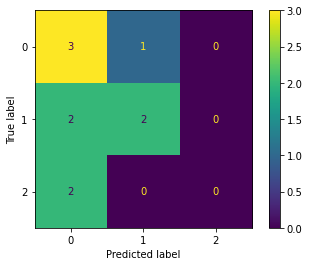

In [46]:
# Creamos la matriz de confusión:
cm = confusion_matrix(df_test.Y, df_test['Neigh = 3'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [47]:
# Calculemos las variables para la clase 0
TP = np.diag(cm)[0]
FP = (cm.sum(axis=0) - TP)[0]  # columna (axis = 0 representa la suma por columnas)
FN = (cm.sum(axis=1) - TP)[0]  # fila (axis = 1 representa la suma por filas)
TN = np.diag(cm)[1] + np.diag(cm)[2]

# Precicion Global
ACC_1 = '{:.2f}'.format((TP+TN)/(TP+FP+FN+TN))
# Sensibilidad
TPR_1 = '{:.2f}'.format(TP/(TP+FN))
# False positive rate
FPR_1 = '{:.2f}'.format(FP/(FP+TN))
# Especificidad
TNR_1 = '{:.2f}'.format(TN/(TN+FP) )
# Precision
PPV_1 = '{:.2f}'.format(TP/(TP+FP))
#F1 score
F1_1 = '{:.2f}'.format((2*TP) / (2*TP+FP+FN))

In [48]:
# Calculemos las variables para la clase 1
TP = np.diag(cm)[1]
FP = (cm.sum(axis=0) - TP)[1]  # columna (axis = 0 representa la suma por columnas)
FN = (cm.sum(axis=1) - TP)[1]  # fila (axis = 1 representa la suma por filas)
TN = np.diag(cm)[0] + np.diag(cm)[2]

# Precicion Global
ACC_2 = '{:.2f}'.format((TP+TN)/(TP+FP+FN+TN))
# Sensibilidad
TPR_2 = '{:.2f}'.format(TP/(TP+FN))
# False positive rate
FPR_2 = '{:.2f}'.format(FP/(FP+TN))
# Especificidad
TNR_2 = '{:.2f}'.format(TN/(TN+FP) )
# Precision
PPV_2 = '{:.2f}'.format(TP/(TP+FP))
#F1 score
F1_2 = '{:.2f}'.format((2*TP) / (2*TP+FP+FN))

In [49]:
# Calculemos las variables para la clase 2
TP = np.diag(cm)[2]
FP = (cm.sum(axis=0) - TP)[2]  # columna (axis = 0 representa la suma por columnas)
FN = (cm.sum(axis=1) - TP)[2]  # fila (axis = 1 representa la suma por filas)
TN = np.diag(cm)[0] + np.diag(cm)[2]

# Precicion Global
ACC_3 = '{:.2f}'.format((TP+TN)/(TP+FP+FN+TN))
# Sensibilidad
TPR_3 = '{:.2f}'.format(TP/(TP+FN))
# False positive rate
FPR_3 = '{:.2f}'.format(FP/(FP+TN))
# Especificidad
TNR_3 = '{:.2f}'.format(TN/(TN+FP) )
# Precision
PPV_3 = '{:.2f}'.format(0) # TP/(TP+FP) = 0/0 ==> 0
#F1 score
F1_3 = '{:.2f}'.format((2*TP) / (2*TP+FP+FN))

(0, 3, 0, 2)

In [50]:
print('k = 3   Precision Global | Sensibilidad | False Positive Rate | Especificidad | Precision | F1 Score')
print(f'Se\t    {ACC_1}         |     {TPR_1}\t|\t{FPR_1}\t      |      {TNR_1}     |   {PPV_1}    |   {F1_1}')
print(f'Ve\t    {ACC_2}         |     {TPR_2}\t|\t{FPR_2}\t      |      {TNR_2}     |   {PPV_2}    |   {F1_2}')
print(f'Vi\t    {ACC_3}         |     {TPR_3}\t|\t{FPR_3}\t      |      {TNR_3}     |   {PPV_3}    |   {F1_3}')  

k = 3   Precision Global | Sensibilidad | False Positive Rate | Especificidad | Precision | F1 Score
Se	    0.50         |     0.75	|	0.67	      |      0.33     |   0.43    |   0.55
Ve	    0.62         |     0.50	|	0.25	      |      0.75     |   0.67    |   0.57
Vi	    0.60         |     0.00	|	0.00	      |      1.00     |   0.00    |   0.00


**CONCLUSIÓN:**<br\>
Como se puedenobservar en las tablas de resultados, el KNeighborCalssifier es mas preciso para k=1 que para k=3 en prácticamente todos los valores sin embargo, sería combeniente revisar el modelo para k=2 y k=4 de modo que pueda verificarse cual es el valor de k mas adecuado para este modelo en concreto.

***

# Problema IV

**Explicar en qué consiste la metodología de RandomForest.**

La metodología *random forest* consiste en emplear varios árboles de decisión para realizar una predicción es decir, dado un problema de clasificación, se introducen los datos en diversos árboles de decisión y mediante operaciones internas, cada árbol devolverá una predicción. A continuación por mayoría, se realiza la predicción final. <br/>
Estos clasificadores son de los mejores clasificando información para grupos grandes de datos, son muy útiles para discernir que variables tienen más peso en las predicciones y no tienen ningún problema en manejar grandes cantidades de variables. Sin embargo, no son útiles con sets de datos ruidosos o con grandes grupos de atributos correlacionados de similar relevancia y sus resultados son difíciles de interpretar.

# Bibliografia:

   * **Real Python**: https://realpython.com/
   * **towards data science**: https://towardsdatascience.com/
   * **Pandas**: https://pandas.pydata.org/
   * **Geeks for Geeks**: https://www.geeksforgeeks.org